In [1]:
# Useful additional packages
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from math import pi
from numpy import random
from qiskit.aqua.operators import I, X, Y, Z


In [2]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.visualization import circuit_drawer
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import state_fidelity
from qiskit import BasicAer
from qiskit import Aer

backend = BasicAer.get_backend('unitary_simulator')

{'101': 3, '110': 42, '111': 1955}
{'000': 1828, '001': 163, '010': 9}
{'101': 21, '110': 44, '111': 1935}
{'000': 1946, '010': 54}
{'100': 1, '101': 85, '110': 46, '111': 1868}
{'000': 1707, '001': 179, '010': 112, '011': 2}
{'100': 4, '101': 147, '110': 46, '111': 1803}
{'000': 1806, '001': 1, '010': 193}
{'100': 6, '101': 225, '110': 51, '111': 1718}
{'000': 1571, '001': 141, '010': 288}
[{'101': 3, '110': 42, '111': 1955}, {'000': 1828, '001': 163, '010': 9}, {'101': 21, '110': 44, '111': 1935}, {'000': 1946, '010': 54}, {'100': 1, '101': 85, '110': 46, '111': 1868}, {'000': 1707, '001': 179, '010': 112, '011': 2}, {'100': 4, '101': 147, '110': 46, '111': 1803}, {'000': 1806, '001': 1, '010': 193}, {'100': 6, '101': 225, '110': 51, '111': 1718}, {'000': 1571, '001': 141, '010': 288}]
     ┌───┐        ┌─────────────┐                ░ ┌───┐        ┌─────────────┐»
q_0: ┤ X ├───■────┤ RX(0.30052) ├────────────────░─┤ X ├───■────┤ RX(0.30052) ├»
     ├───┤┌──┴───┐└─────────────┘┌─────

Text(0, 0.5, 'Magnetisation, M_z')

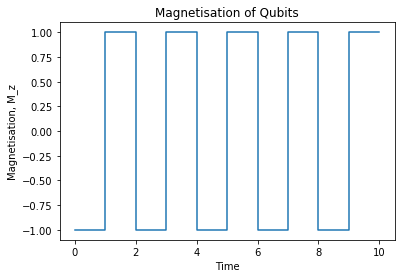

In [3]:
nq=3
n=10
# Create a Quantum Circuit acting on a quantum register of i qubits
circ = QuantumCircuit(nq)

#creating the state array
state = []
    
#Creating the angle of rotation
r=random.rand(nq)*pi/10

#Making the cicuit
j=0
while j<n:
    
    # Add controlled phase gates
    i=0
    while i<nq:
        circ.x(i)
        i+=1
    i=0
    while i+1<nq:
        circ.cp(pi,i,i+1)
        i+=1
    i=0
    while i+1<nq:
        circ.rx(r[i],i)
        i+=1
            
    circ.barrier(range(nq))
    meas = QuantumCircuit(nq, nq)
    meas.measure(range(nq), range(nq))
    qc = circ + meas
    
    # Use Aer's qasm_simulator
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc, backend, shots=2000)
    result = job.result()
    counts = result.get_counts(qc)
    print(counts)
    
    state.append(counts)
    
    j+=1

print(state)    
print(qc.draw())
    
mag = []; t = []
for k in range(len(state)):
    if '0'*nq in state[k]:
        mag.append(1)
        mag.append(1)
    elif '1'*nq in state[k]:
        mag.append(-1)
        mag.append(-1)
    else: break
    t.append(k)
    t.append(k+1)


plt.plot(t,mag)
plt.title("Magnetisation of Qubits")
plt.xlabel("Time")
plt.ylabel("Magnetisation, M_z")

In [9]:
expectation_value = (~state[1]@Z^Z@state[1]).eval()

TypeError: bad operand type for unary ~: 'Counts'

In [7]:
state[1]

{'000': 1828, '001': 163, '010': 9}

In [12]:
import numpy as np
from qiskit.aqua.operators import Z, Zero, One

operator = Z ^ Z 
psi = ((state[1]))
expectation_value = (~psi @ operator @ psi).eval()
print(expectation_value.real)  

TypeError: bad operand type for unary ~: 'Counts'